![google](https://miro.medium.com/max/5044/1*eWaR0HeJSwGbIvygkFZUGg.png)
**Google** 

As a Data Scientist, you will evaluate and improve Google's products. You will collaborate with a multi-disciplinary team of engineers and analysts on a wide range of problems, but we wanna just work on google ))

hope you enjoy!


## Dataset Overlook

In [651]:

plt.style.use('ggplot')

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

import seaborn as sns
import plotly.express as px

import pydicom # for DICOM images
from skimage.transform import resize

# SKLearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import os
import random
import re
import math
import time
from IPython.display import display_html
import missingno as msno 
import gc
import cv2
import matplotlib.image as mpimg


# Setting color palette.
black_red = [
    '#1A1A1D', '#4E4E50', '#C5C6C7', '#6F2232', '#950740', '#C3073F'
]

# Setting plot styling.
plt.style.use('fivethirtyeight')


import warnings

warnings.filterwarnings('ignore') # Disabling warnings for clearer outputs


seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)

In [652]:
df = pd.read_csv('../input/google-job-skills/job_skills.csv')

In [653]:
df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical programs designed to support the work of Cloud Customer Engineers and Solutions Architects.\nMeasure and report on key metrics tied to those programs to identify any need to change course, cancel, or scale the programs from a regional to global platform.\nCommunicate status and identify any obstacles and paths for resolution to stakeholders, including those in senior roles, in a transparent, regular, professional and timely manner.\nEstablish expectations and rationale on deliverables for stakeholders and program contributors.\nProvide program performance feedback to teams in Product, Engineering, Sales, and Marketing (among others) to enable efficient cross-team operations.","BA/BS degree or equivalent practical experience.\n3 years of experience in program and/or project management in cloud computing, enterprise software and/or marketing technologies.","Experience in the business technology market as a program manager in SaaS, cloud computing, and/or emerging technologies.\nSignificant cross-functional experience across engineering, sales, and marketing teams in cloud computing or related technical fields.\nProven successful program outcomes from idea to launch in multiple contexts throughout your career.\nAbility to manage the expectations, demands and priorities of multiple internal stakeholders based on overarching vision and success for global team health.\nAbility to work under pressure and possess flexibility with changing needs and direction in a rapidly-growing organization.\nStrong organization and communication skills."
1,Google,"Supplier Development Engineer (SDE), Cable/Connector",Manufacturing & Supply Chain,"Shanghai, China","Drive cross-functional activities in the supply chain for overall Technical Operational readiness in all NPI phases leading into mass production.\nCollaborate with suppliers and Engineering teams in assessing process technologies based on project requirements, and propose and develop the manufacturing blueprint including process flow, equipment/fixture designs, implementation schedules and validation plans for engineering builds and mass production.\nDrive project technical and operational issues with material, process, fixtures, equipment, etc. during the NPI phase to enable delivery of a mature product and manufacturing process into mass production. Support/drive continuous improvement efforts in the supply chain.\nLead suppliers by providing technical direction to establish and validate (utilizing statistical tools) process capability during the NPI phase for consistently delivering a quality product in mass production.\nUtilize DOE’s, FMEA and other Industry standard tools to proactively identify and address risks and optimize process parameters.","BS degree in an Engineering discipline or equivalent practical experience.\n7 years of experience in Cable/Connector Design or Manufacturing in an NPI role.\nExperience working with Interconnect Engineering and Product Design (PD)/Mechanical Engineer in developing, manufacturing and testing.\nAbility to speak and write in English and Mandarin fluently and idiomatically.","BSEE, BSME or BSIE degree.\nExperience of using Statistics tools for Data analysis, e.g. distribution histogram/pareto chart, process control chart, Design of Experiment (DOE), Correlation Analysis, etc.\nDemonstrated knowledge in PCBA manufacturing process and quality control.\nFamilar with cable/connector related components' manufacturing: moldling, stamping, die-casting, LIM, MIM process and materials.\nSelf starter with innovation, integrity and attention to detail.\nAbility to travel up to 50% of the time"
2,Google,"Data Analyst, Product and Tools Operations, Google Technical Services",Technical Solutions,"New York, NY, United States","Collect and analyze data to d

In [654]:
df.tail()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
1245,Google,Global Investigator,Real Estate & Workplace Services,"Boulder, CO, United States","Develop protocols and practices to assess and mitigate threats to company assets; manage crises and deliver threat assessment services by collecting, evaluating and disseminating accurate and timely intelligence information to appropriate managers.\nInvestigate possible violations of Google's codes and policies (finance, HR, conduct) or other business conditions (theft, vandalism, physical harm) and provide appropriate reports to management summarizing the findings.\nConduct audits and other research to identify process deficiencies which could allow inappropriate business conduct, and recommend protocols and policies to address those weaknesses.\nDevelop relationships with domestic and international law enforcement and government counterparts, as well as private sector peers worldwide.\nConduct interviews of employees and contractors for suspected violations of policy.",BA/BS degree or equivalent practical experience.\n4 years of experience with investigations in a private sector/public sector environment.,"Investigative or Interview certification through a national or international organization.\n1 year of experience conducting diverse investigations ranging from workplace violence, threat mitigation, financial crimes, corrupt practices, thefts and insider threat.\n1 year of experience in supply chain investigations\n1 year of experience leading interviews including non-confrontational interviewing techniques.\nCCTV experience.\nAbility to speak and write in Spanish, Chinese, Portuguese or Hindi fluently and idiomatically."
1246,Google,Campus Security Manager,Real Estate & Workplace Services,"Boulder, CO, United States","Manage the daily operations of the security vendors providing services including system integration and guard force. Implement performance of corporate security standards, policies and practices.\nManage security and safety vendors associated with construction or building improvement projects to ensure timely delivery of services.\nDevelop security plan for onsite special events and other unique security situations to assure proper access control and evacuation procedures are followed.\nPerform data analysis and create benchmarking to support risk assessments and threat identification.\nPartner with facilities and other Google business units to identify security deficiencies, and develop customized policies and procedures to gain compliance with regulations internal and external to Google.",BA/BS degree or equivalent practical experience.\n7 years of experience in corporate security working with contract vendor management and/or security guard force management.\nAbility to travel approximately 20% of the time.,"Master’s degree.\nProficient in the use of common business software programs. Familiarity with Google applications.\nConsiderable knowledge of security technology including access control, CCTV, identification and special applications.\nDependable, flexible, and be able to work independently as well as part of a team.\nExcellent written and oral communication skills and ability to handle highly confidential and sensitive information. Excellent judgment, discretion and diplomacy."
1247,Google,Facilities Manager,Real Estate & Workplace Services,"Xinyi District, Taiwan","Collaborate with functional teams; plan and manage delivery of daily office activities, employee programs, and service objectives.\nOversee office operations including vendor management, facilities services, maintenance of building and mechanical systems, janitorial service and supplies, and health and safety.\nCollaborate with other business units to meet company goals and standards as a business partner.\nManage outsourced facilities services vendor and facilities budget; ensure best practices are being created by using and testing Google product

# Data Cleaning

In [655]:
# Change the columns name
df = df.rename(columns={'Minimum Qualifications': 'Minimum_Qualifications', 'Preferred Qualifications': 'Preferred_Qualifications'})

I'll check if there is any NaN

In [656]:
pd.isnull(df).sum()

Company                     0 
Title                       0 
Category                    0 
Location                    0 
Responsibilities            15
Minimum_Qualifications      14
Preferred_Qualifications    14
dtype: int64

I'll straightly drop these rows with NaN

In [657]:
df = df.dropna(how='any',axis='rows')

Here, the first thing I want to check is the values_count of each column

In [658]:
df.Company.value_counts()

Google     1212
YouTube    23  
Name: Company, dtype: int64

In [659]:
#labels
lab = df["Company"].value_counts().keys().tolist()

#values
val = df["Company"].value_counts().values.tolist()

trace1 = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ "#6F2232" ,"#4E4E50"],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Gender Distribution",
                        plot_bgcolor  = "#1A1A1D",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )



data = [trace1]
fig  = go.Figure(data = data,layout = layout)
py.iplot(fig)

Ah! Right. I forgot that Youtube is also part of Google. However, for me, working in Youtube is not as appealing as working in Google. But Youtube is still a great company. No offence haha!

In [660]:
# So I drop Youtube
df = df[df.Company != 'YouTube']

In [661]:
df.Title.value_counts()[:10]

Business Intern 2018                          35
MBA Intern, Summer 2018                       34
MBA Intern 2018                               28
BOLD Intern, Summer 2018                      21
Field Sales Representative, Google Cloud      17
Interaction Designer                          12
User Experience Researcher                    9 
User Experience Design Intern, Summer 2018    7 
Partner Sales Engineer, Google Cloud          7 
Recruiter                                     7 
Name: Title, dtype: int64

In [662]:
df.Location.value_counts()[:10]

Mountain View, CA, United States    187
Sunnyvale, CA, United States        155
Dublin, Ireland                     87 
New York, NY, United States         68 
London, United Kingdom              61 
San Francisco, CA, United States    49 
Singapore                           39 
Sydney, Australia                   31 
Tokyo, Japan                        31 
Seattle, WA, United States          27 
Name: Location, dtype: int64

In [663]:
df['Country'] = df['Location'].apply(lambda x : x.split(',')[-1])

In [664]:
df.Country.value_counts()[:15]

 United States     607
 Ireland           87 
 United Kingdom    61 
 Germany           53 
Singapore          39 
 China             38 
 Australia         35 
 Japan             31 
 Taiwan            30 
 India             27 
 Switzerland       22 
 France            20 
 Brazil            15 
 Poland            11 
 Israel            11 
Name: Country, dtype: int64

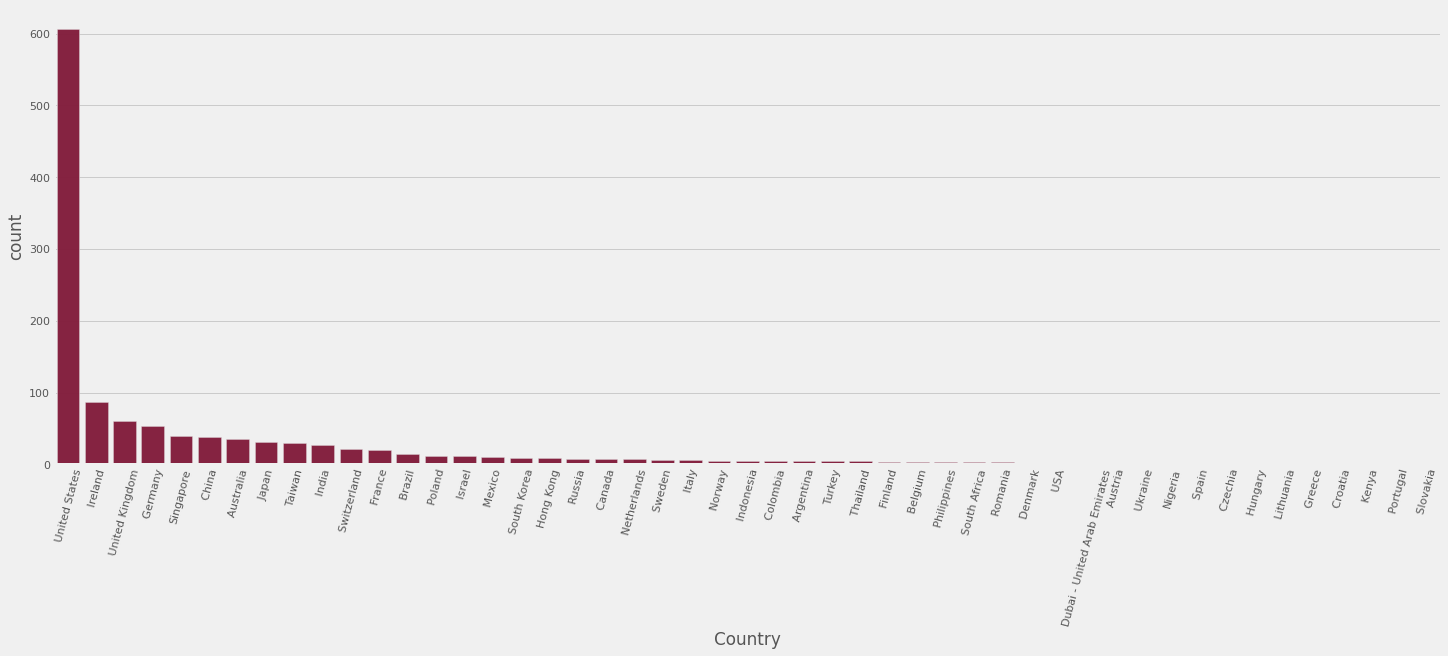

In [665]:
# Creating a customized chart and giving in figsize etc.

fig = plt.figure(constrained_layout=True, figsize=(20, 9))

# Creating a grid:

grid = gridspec.GridSpec(ncols=4, nrows=2, figure=fig)

sns.countplot(df.Country,
              alpha=0.9,
              color='#1A1A1D',
              label='Country',
              order=df['Country'].value_counts().index)
sns.countplot(df.Country,
              alpha=0.7,
              color='#C3073F',
              label='Country',
              order=df['Country'].value_counts().index)

plt.xticks(rotation=75)
plt.show()

**Here, I want to extract the year of work experience in each position.**

The challenge is : 

* There might be some positions requiring work experience in different field
* There might be some positions that don't mention work experience at all

In [666]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english')) 

df['Responsibilities'] = df.Responsibilities.apply(lambda x: word_tokenize(x))
df['Responsibilities'] = df.Responsibilities.apply(lambda x: [w for w in x if w not in stop_words])
df['Responsibilities'] = df.Responsibilities.apply(lambda x: ' '.join(x))

df['Minimum_Qualifications'] = df.Minimum_Qualifications.apply(lambda x: word_tokenize(x))
df['Minimum_Qualifications'] = df.Minimum_Qualifications.apply(lambda x: [w for w in x if w not in stop_words])
df['Minimum_Qualifications'] = df.Minimum_Qualifications.apply(lambda x: ' '.join(x))

df['Preferred_Qualifications'] = df.Preferred_Qualifications.apply(lambda x: word_tokenize(x))
df['Preferred_Qualifications'] = df.Preferred_Qualifications.apply(lambda x: [w for w in x if w not in stop_words])
df['Preferred_Qualifications'] = df.Preferred_Qualifications.apply(lambda x: ' '.join(x))

In [667]:
# The way to extract year refer to https://www.kaggle.com/niyamatalmass/what-you-need-to-get-a-job-at-google.
# Thanks Niyamat Ullah for such brilliant way. Go check his kernel. It's great!
import re
df['Minimum_years_experience'] = df['Minimum_Qualifications'].apply(lambda x : re.findall(r'([0-9]+) year',x))
# Fill empty list with [0]
df['Minimum_years_experience'] = df['Minimum_years_experience'].apply(lambda y : [0] if len(y)==0 else y)
#Then extract maximum in the list to have the work experience requirement
df['Minimum_years_experience'] = df['Minimum_years_experience'].apply(lambda z : max(z))
df['Minimum_years_experience'] = df.Minimum_years_experience.astype(int)

In [668]:
df.head(3)

,Company,Title,Category,Location,Responsibilities,Minimum_Qualifications,Preferred_Qualifications,Country,Minimum_years_experience
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape , shepherd , ship , show technical programs designed support work Cloud Customer Engineers Solutions Architects . Measure report key metrics tied programs identify need change course , cancel , scale programs regional global platform . Communicate status identify obstacles paths resolution stakeholders , including senior roles , transparent , regular , professional timely manner . Establish expectations rationale deliverables stakeholders program contributors . Provide program performance feedback teams Product , Engineering , Sales , Marketing ( among others ) enable efficient cross-team operations .","BA/BS degree equivalent practical experience . 3 years experience program and/or project management cloud computing , enterprise software and/or marketing technologies .","Experience business technology market program manager SaaS , cloud computing , and/or emerging technologies . Significant cross-functional experience across engineering , sales , marketing teams cloud computing related technical fields . Proven successful program outcomes idea launch multiple contexts throughout career . Ability manage expectations , demands priorities multiple internal stakeholders based overarching vision success global team health . Ability work pressure possess flexibility changing needs direction rapidly-growing organization . Strong organization communication skills .",Singapore,3
1,Google,"Supplier Development Engineer (SDE), Cable/Connector",Manufacturing & Supply Chain,"Shanghai, China","Drive cross-functional activities supply chain overall Technical Operational readiness NPI phases leading mass production . Collaborate suppliers Engineering teams assessing process technologies based project requirements , propose develop manufacturing blueprint including process flow , equipment/fixture designs , implementation schedules validation plans engineering builds mass production . Drive project technical operational issues material , process , fixtures , equipment , etc . NPI phase enable delivery mature product manufacturing process mass production . Support/drive continuous improvement efforts supply chain . Lead suppliers providing technical direction establish validate ( utilizing statistical tools ) process capability NPI phase consistently delivering quality product mass production . Utilize DOE ’ , FMEA Industry standard tools proactively identify address risks optimize process parameters .","BS degree Engineering discipline equivalent practical experience . 7 years experience Cable/Connector Design Manufacturing NPI role . Experience working Interconnect Engineering Product Design ( PD ) /Mechanical Engineer developing , manufacturing testing . Ability speak write English Mandarin fluently idiomatically .","BSEE , BSME BSIE degree . Experience using Statistics tools Data analysis , e.g . distribution histogram/pareto chart , process control chart , Design Experiment ( DOE ) , Correlation Analysis , etc . Demonstrated knowledge PCBA manufacturing process quality control . Familar cable/connector related components ' manufacturing : moldling , stamping , die-casting , LIM , MIM process materials . Self starter innovation , integrity attention detail . Ability travel 50 % time",China,7
2,Google,"Data Analyst, Product and Tools Operations, Google Technical Services",Technical Solutions,"New York, NY, United States","Collect analyze data draw insight identify strategic solutions . Build consensus facilitating broad collaboration clear communication documentation . Work cross-functional stakeholders gather requirements , manage implementation , drive delivery projects .","Bachelor ’ degree Business , Economics , Statistics , Operations Research related analytical field , equivalent practical experience . 2 years work experience busines

In [669]:
df.Minimum_years_experience.describe()

count    1212.000000
mean     2.842409   
std      3.301640   
min      0.000000   
25%      0.000000   
50%      2.000000   
75%      5.000000   
max      15.000000  
Name: Minimum_years_experience, dtype: float64

In [670]:
df.Category.value_counts()[:10]

Sales & Account Management    167
Marketing & Communications    161
Finance                       112
Technical Solutions           100
Business Strategy             92 
People Operations             86 
User Experience & Design      83 
Program Management            72 
Partnerships                  58 
Product & Customer Support    48 
Name: Category, dtype: int64

In [671]:
#labels
lab = df["Category"].value_counts().keys().tolist()

#values
val = df["Category"].value_counts().values.tolist()

trace1 = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Category",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace1]
fig  = go.Figure(data = data,layout = layout)
py.iplot(fig)

## <a id="0">Exploratory</a>

In [672]:
pd.set_option('display.max_colwidth', -1)
df.head(1)

,Company,Title,Category,Location,Responsibilities,Minimum_Qualifications,Preferred_Qualifications,Country,Minimum_years_experience
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape , shepherd , ship , show technical programs designed support work Cloud Customer Engineers Solutions Architects . Measure report key metrics tied programs identify need change course , cancel , scale programs regional global platform . Communicate status identify obstacles paths resolution stakeholders , including senior roles , transparent , regular , professional timely manner . Establish expectations rationale deliverables stakeholders program contributors . Provide program performance feedback teams Product , Engineering , Sales , Marketing ( among others ) enable efficient cross-team operations .","BA/BS degree equivalent practical experience . 3 years experience program and/or project management cloud computing , enterprise software and/or marketing technologies .","Experience business technology market program manager SaaS , cloud computing , and/or emerging technologies . Significant cross-functional experience across engineering , sales , marketing teams cloud computing related technical fields . Proven successful program outcomes idea launch multiple contexts throughout career . Ability manage expectations , demands priorities multiple internal stakeholders based overarching vision success global team health . Ability work pressure possess flexibility changing needs direction rapidly-growing organization . Strong organization communication skills .",Singapore,3


Here, I want to extract degree requirement of each rows. Also, the language required for each role.

In [673]:
Degree = ['BA','BS','Bachelor','MBA','Master','PhD']

Degrees = dict((x,0) for x in Degree)
for i in Degree:
    x = df['Minimum_Qualifications'].str.contains(i).sum()
    if i in Degrees:
        Degrees[i] = x
        
print(Degrees)

{'BA': 890, 'BS': 860, 'Bachelor': 163, 'MBA': 71, 'Master': 80, 'PhD': 8}


In [674]:
degree_requirement = sorted(Degrees.items(), key=lambda x: x[1], reverse=True)
degree = pd.DataFrame(degree_requirement,columns=['Degree','Count'])
degree['Count'] = degree.Count.astype('int')
degree

,Degree,Count
0,BA,890
1,BS,860
2,Bachelor,163
3,Master,80
4,MBA,71
5,PhD,8


In [675]:
fig = px.sunburst(data_frame=degree,
                  path=['Degree','Count'],
                  color='Degree',
                  color_discrete_sequence=black_red,
                  maxdepth=-1,
                  title='Degrees Distribution')

fig.update_traces(textinfo='label+percent parent')
fig.update_layout(margin=dict(t=50, l=0, r=0, b=0))
fig.show()

Obviously, most of the positions require basic degree, while some require further education degree, like Master and PhD.

Now, I want to see the distribution of the requiring work experience.

Text(0, 0.5, 'Years')

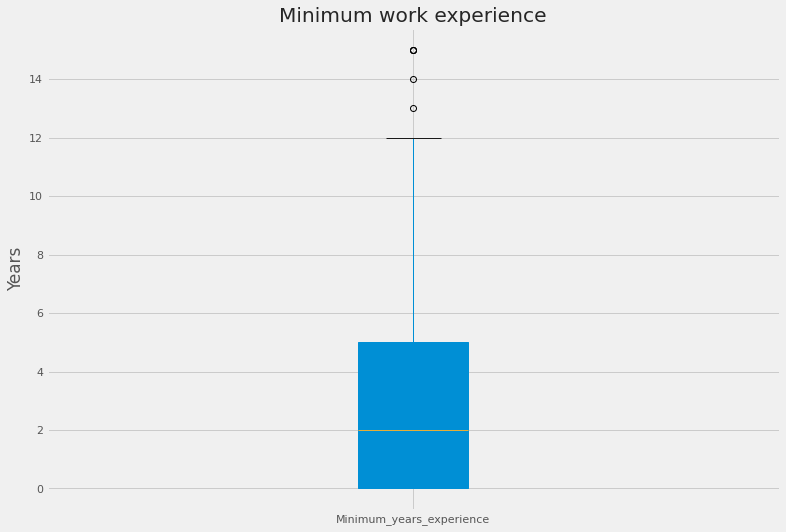

In [677]:
df.Minimum_years_experience.plot(kind='box', patch_artist=True)
plt.title('Minimum work experience')
plt.ylabel('Years')

Well, obviously, there are few outliers. It must be some real senior positions.

Text(0.5, 0.98, 'Minimum work experience')

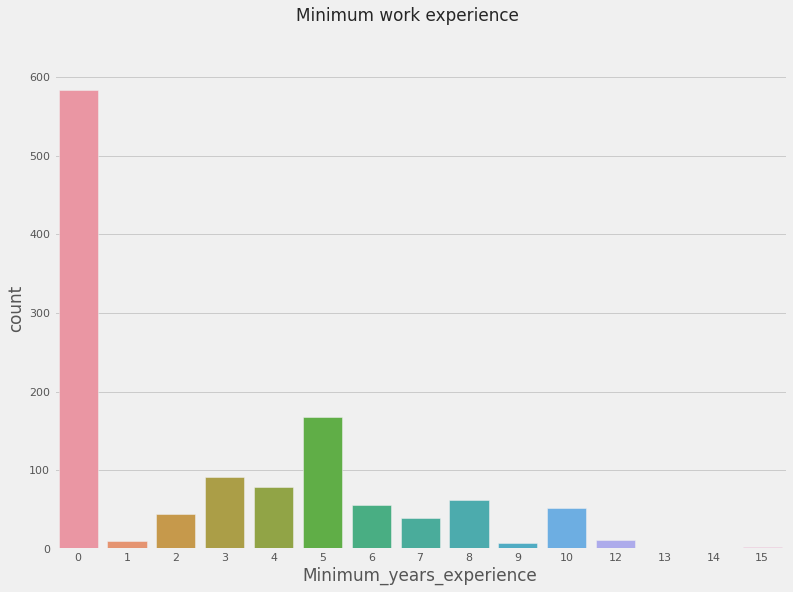

In [678]:
import seaborn as sns
sns.countplot('Minimum_years_experience',data=df)
plt.suptitle('Minimum work experience')

Basically, most of the position didn't mention experience. However, I'll dig deeper later.

In [679]:
Programming_Languages = ['Python', 'Java ','C#', 'PHP', 'Javascript', 'Ruby', 'Perl', 'SQL','Go ']

Languages = dict((x,0) for x in Programming_Languages)
for i in Languages:
    x = df['Minimum_Qualifications'].str.contains(i).sum()
    if i in Languages:
        Languages[i] = x
        
print(Languages)

{'Python': 96, 'Java ': 71, 'C#': 0, 'PHP': 7, 'Javascript': 3, 'Ruby': 14, 'Perl': 6, 'SQL': 69, 'Go ': 26}


In [680]:
languages_requirement = sorted(Languages.items(), key=lambda x: x[1], reverse=True)
language = pd.DataFrame(languages_requirement,columns=['Language','Count'])
language['Count'] = language.Count.astype('int')
language

,Language,Count
0,Python,96
1,Java,71
2,SQL,69
3,Go,26
4,Ruby,14
5,PHP,7
6,Perl,6
7,Javascript,3
8,C#,0


In [681]:
fig = px.sunburst(data_frame=language,
                  path=['Language','Count'],
                  color='Language',
                  color_discrete_sequence=black_red,
                  maxdepth=-1,
                  title='Languages Distribution')

fig.update_traces(textinfo='label+text+current path+percent entry+percent parent')
fig.update_layout(margin=dict(t=20, l=0, r=0, b=0))
fig.show()

Text(0.5, 0, 'Count')

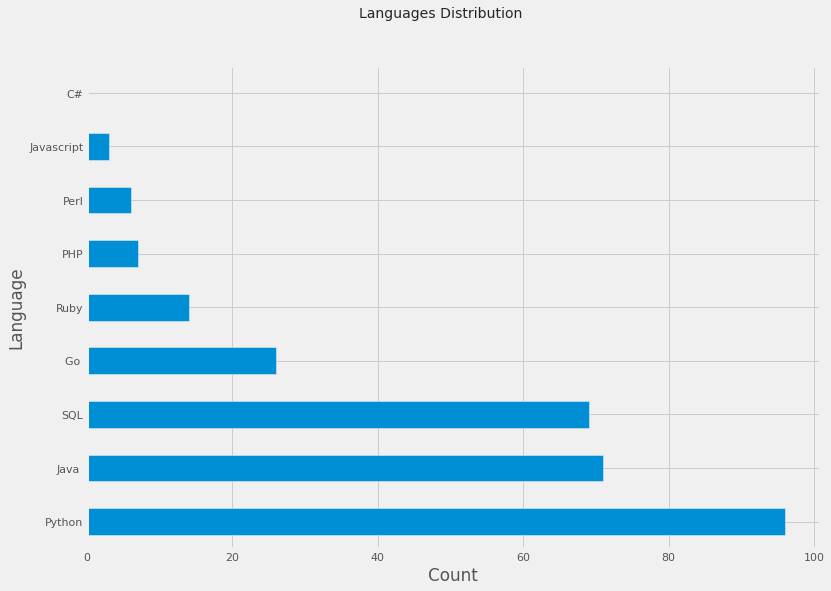

In [682]:
language.plot.barh(x='Language',y='Count',legend=False)
plt.suptitle('Languages Distribution',fontsize=14)
plt.xlabel('Count')

Python, SQL are also important, which indicates that the growing demand of data analysis

## <a id=12>Functions</a>
As a guy on twitter said, " If you write a code more than three times, write a function instead." I'm here to define the functions that I'm going to use in the next few sections

In [683]:
def MadeWordCloud(title,text):
    df_subset = df.loc[df.Title.str.contains(title).fillna(False)]
    long_text = ' '.join(df_subset[text].tolist())
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    wordcloud = WordCloud(mask=G,background_color="white").generate(long_text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.title(text,size=24)
    plt.show()

### Here, I want to create word clouds to know more about how to be qualified to be a competitive candidates for data-related positions in Google
## <a id="1">Analyst :</a>

**I'll demonstrate the original way I made word cloud here, after that, I'll replace it with the function**

In [684]:
# Refer to https://python-graph-gallery.com/262-worcloud-with-specific-shape/
# https://amueller.github.io/word_cloud/auto_examples/masked.html

df_Analyst = df.loc[df.Title.str.contains('Analyst').fillna(False)]

In [685]:
df_Analyst.head(1)

,Company,Title,Category,Location,Responsibilities,Minimum_Qualifications,Preferred_Qualifications,Country,Minimum_years_experience
2,Google,"Data Analyst, Product and Tools Operations, Google Technical Services",Technical Solutions,"New York, NY, United States","Collect analyze data draw insight identify strategic solutions . Build consensus facilitating broad collaboration clear communication documentation . Work cross-functional stakeholders gather requirements , manage implementation , drive delivery projects .","Bachelor ’ degree Business , Economics , Statistics , Operations Research related analytical field , equivalent practical experience . 2 years work experience business analysis . 1 year experience statistical modeling , forecasting machine learning . Experience R , SAS Python . 1 year experience developing manipulating large datasets .",Experience partnering consulting cross-functionally senior stakeholders . Proficiency database query language ( e.g . SQL ) . Ability manage multiple projects ambiguous environment . Strong presentation communication skills ability communicate statistical concepts explain recommendations non-experts .,United States,2


In [686]:
df_Analyst.Country.value_counts()

 United States     40
 Switzerland       6 
 Ireland           5 
 United Kingdom    4 
 Japan             1 
 China             1 
Singapore          1 
 Israel            1 
 India             1 
 France            1 
 Germany           1 
Name: Country, dtype: int64

In [687]:
Res_AN = ' '.join(df_Analyst['Responsibilities'].tolist())

In [688]:
# from wordcloud import WordCloud, ImageColorGenerator
# from PIL import Image
# G = np.array(Image.open('../input/googlelogo/img_2241.png'))
# # I spent a while to realize that the image must be black-shaped to be a mask

In [689]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

wordcloud = WordCloud(mask=G,background_color="white").generate(Res_AN)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Responsibilites',size=24)
plt.show()

NameError: name 'G' is not defined

Here we can see some keywords to know more about what a Data Analyst do in Google

### Keywords

* Criteria : Data/Team/Product/Business/Work
* Insight : strategic/quality/key/projects/plan/identify/analysis/action/business/infrastructure
* Audience : sales/operation/stakeholders
* Verb : maintain/improve/support/model/draw/customize/identify/provide
* Characteristic : leadership/quantitative/efficiency

To sum up in a sentence :

**Looking for analysts with business and data knowledge, familiar with product to work as a team**

In [ ]:
MadeWordCloud('Analyst','Minimum_Qualifications')

Here we can see some keywords to know how to meet minimum requirements to be a Data Analyst in Google

### Keywords

* Fileds : Business/Computer Science/Mathematics/Statistics/Economics/Engineering
* Degree : BS/BA
* Languages : Python/SAS/JAVA/SQL
* Tools : Tableau

In [ ]:
MadeWordCloud('Analyst','Preferred_Qualifications')

Here we can see some keywords to know how to be more competitive candidates to be a Data Analyst in Google

### Keywords

* Fileds : Business/Computer Science/Mathematics/Statistics
* Skills : Oral/Written/Comunication/Management
* Experience : Consulting/Analytics/Developing/Cross-functioned

### <a id="1.1">I want to know what Google think about Python vs R</a>

In [ ]:
DataSkill = [' R','Python','SQL','SAS']

DataSkills = dict((x,0) for x in DataSkill)
for i in DataSkill:
    x = df_Analyst['Minimum_Qualifications'].str.contains(i).sum()
    if i in DataSkill:
        DataSkills[i] = x
        
print(DataSkills)

### And then, the degrees

In [ ]:
Degrees = dict((x,0) for x in Degree)
for i in Degree:
    x = df_Analyst['Minimum_Qualifications'].str.contains(i).sum()
    if i in Degrees:
        Degrees[i] = x
        
print(Degrees)

In [ ]:
Degrees = dict((x,0) for x in Degree)
for i in Degree:
    x = df_Analyst['Preferred_Qualifications'].str.contains(i).sum()
    if i in Degrees:
        Degrees[i] = x
        
print(Degrees)

**It seems that Google do prefer a further education degree like master or PhD**

In [ ]:
sns.countplot('Minimum_years_experience',data=df_Analyst)
plt.suptitle('Minimum work experience')

Most of the positions don't require work experience or didn't mention it. However, we can see some of them require 2-5 years experience.

## <a id="2">Developer</a>

In [ ]:
df_Developer = df.loc[df.Title.str.contains('Developer').fillna(False)]

In [ ]:
df_Developer.Country.value_counts()

In [ ]:
MadeWordCloud('Developer','Responsibilities')

### Keywords

* Fileds : Business
* Skills : Manage/Comunication/Management
* Experience : Engineers/Sales/Developer/Android/iOS

I found that the developer positions in Google actually requires some leader's characteristics! It seems that Google don't want an engineer that only know how to code but play a team leader, or even more

In [ ]:
MadeWordCloud('Developer','Minimum_Qualifications')

### Keywords

* Degrees : BA/BS
* Languages : Go/Kotlin/Javascipt/Python/Java
* Criteria : practical experience/degree

The main point for this plot is mostly about experience. It seems that the most importanat thing to be a developer at Google

In [ ]:
MadeWordCloud('Developer','Preferred_Qualifications')

### Keywords

* Criteria : Effective/Ability/Knowledge/Experience

I'll sum up this plot by one sentence :
**Looking for developer that can work effectively and organizedly, having related experience and knowledge, and understanding industry and stakeholders.**

### <a id="2.1">Also, I want to check the languages requirements of developer positions</a>

In [ ]:
DataSkill = ['Java ','Javascript','Go ','Python','Kotlin','SQL']

DataSkills = dict((x,0) for x in DataSkill)
for i in DataSkill:
    x = df_Developer['Minimum_Qualifications'].str.contains(i).sum()
    if i in DataSkill:
        DataSkills[i] = x
        
print(DataSkills)

### Of course, degrees as well

In [ ]:
Degrees = dict((x,0) for x in Degree)
for i in Degree:
    x = df_Developer['Minimum_Qualifications'].str.contains(i).sum()
    if i in Degrees:
        Degrees[i] = x
        
print(Degrees)

In [ ]:
Degrees = dict((x,0) for x in Degree)
for i in Degree:
    x = df_Developer['Preferred_Qualifications'].str.contains(i).sum()
    if i in Degrees:
        Degrees[i] = x
        
print(Degrees)

**Compare to those of Analyst, Google don't actually prefer candidates with a further education degree.**
**I guess it's because there are many theories, like mathematics, statistics, calculus required for analysts** 

In [ ]:
sns.countplot('Minimum_years_experience',data=df_Developer)
plt.suptitle('Minimum work experience')

Though most of the positions didn't mention the required work experience, we can still see 3 years experience might be a good qualification.

## <a id="3">MBA Intern</a>

I'm interested in these MBA Intern positions since it's also happening in my country, Taiwan, too. I wonder what they need to get the position and if they need to know how to code, what languages they need, etc. So, another time when Word Cloud come to be useful.

In [ ]:
df_MBA = df.loc[df.Title.str.contains('MBA').fillna(False)]

In [ ]:
df_MBA.head(1)

In [ ]:
df_MBA.Category.value_counts()

In [ ]:
df_MBA.Country.value_counts()

In [ ]:
MadeWordCloud('MBA','Responsibilities')

In [ ]:
MadeWordCloud('MBA','Minimum_Qualifications')

In [ ]:
MadeWordCloud('MBA','Preferred_Qualifications')

OK, so I finally see some criteria here:

* Soft skills : Management/Organizational
* Characteristics : Strategic/Independent/Changing environment
* Good to have : Project/interest of technology

### <a id="3.1">How about the languages</a>

In [ ]:
Languages = dict((x,0) for x in Programming_Languages)
for i in Languages:
    x = df_MBA['Minimum_Qualifications'].str.contains(i).sum()
    if i in Languages:
        Languages[i] = x
        
print(Languages)

In [ ]:
Languages = dict((x,0) for x in Programming_Languages)
for i in Languages:
    x = df_MBA['Preferred_Qualifications'].str.contains(i).sum()
    if i in Languages:
        Languages[i] = x
        
print(Languages)

In [ ]:
sns.countplot('Minimum_years_experience',data=df_MBA)
plt.suptitle('Minimum work experience')

We can see that since it's MBA intern positions, there is no need for work experience

## <a id="4">Sales</a>

In [ ]:
df_Sales = df.loc[df.Title.str.contains('Sales').fillna(False)]

In [ ]:
df_Sales.Category.value_counts()

In [ ]:
df_Sales.Country.value_counts()[:5]

In [ ]:
MadeWordCloud('Sales','Responsibilities')

There are a lot of words in this plot. However, I can still sum it up:

* Soft skills : Management/Plan
* Characteristics : Cross functional/Strategic
* Good to be familiar with : Product/Google Cloud Platform/Client/Partner/Develop

In [ ]:
MadeWordCloud('Sales','Minimum_Qualifications')

There are a lot of words in this plot. However, I can still sum it up:

* Degree : BA/BS/Bachelor
* Speaking : Fluentual/Idiomatically/English
* Characteristics : Experienced/Practical
* Good to be familiar with : Cloud computing

In [ ]:
MadeWordCloud('Sales','Preferred_Qualifications')

There are a lot of words in this plot. However, I can still sum it up:

* Skills : Project Management
* Characteristics : Fast Paced/Demonstrated/Cross functional/Effectively/Experienced
* Good to be familiar with : PaaS/IaaS/Big Data/Google Cloud/Computer Science

### <a id="4.1">Now, let's talk about the languages</a>

In [ ]:
Languages = dict((x,0) for x in Programming_Languages)
for i in Languages:
    x = df_Sales['Minimum_Qualifications'].str.contains(i).sum()
    if i in Languages:
        Languages[i] = x
        
print(Languages)

In [ ]:
Languages = dict((x,0) for x in Programming_Languages)
for i in Languages:
    x = df_Sales['Preferred_Qualifications'].str.contains(i).sum()
    if i in Languages:
        Languages[i] = x
        
print(Languages)

As I expected, some of the sales need to know SQL. And since some sales are in techical department, they need to know some other languages.

In [ ]:
sns.countplot('Minimum_years_experience',data=df_Sales)
plt.suptitle('Minimum work experience')

Still, most of the positions didn't mention work experience required. However, we can see that there are more senior sales positions in Google that requrie more than 5 years experience.

## <a id="5">Microsoft Office</a>

I just came up with this question. Do Google put Microsoft Office in their requirements? Some people told me that Microsoft Office is so basic that I should not put them in my LinkedIn Skills. However, a lot of company still mention it in their position requirement. Let's see if Google do it or not.

In [ ]:
Microsoft_Office = ['Excel','Powerpoint','Word','Microsoft']

MO = dict((x,0) for x in Microsoft_Office)
for i in MO:
    x = df['Minimum_Qualifications'].str.contains(i).sum()
    if i in Microsoft_Office:
        MO[i] = x
        
print(MO)

Cool, so Google generally agree with the idea that Microsoft Office is basic. They only mention Word. I'l say that there is no need to mention it in the requirements.

## <a id="6">Data Visualization Tools</a>

I wonder if Google has a preference about the data visualization. There are some leaders in the field, like Tableau, Power BI, Qlik, and Google Visual Studio. Let me check if these are in the minimum requirements and preference requirements.

In [ ]:
DV_Tools = ['Tableau','Power BI','Qlik','Data Studio','Google Analytics','GA']

DV = dict((x,0) for x in DV_Tools)
for i in DV:
    x = df['Minimum_Qualifications'].str.contains(i).sum()
    if i in DV_Tools:
        DV[i] = x
        
print(DV)

It seems that even though Google has Visual Studio made by themselves, Tableau is still taking lead in the field.

## <a id="7">Statistical Analysis Tools</a>

I wonder if Google do prefer any of the statistical analysis tools. In my acknowledge, there are SPSS, R, Matlab, Excel, Google Spreadsheet, and SAS in this field.

In [ ]:
SA_Tools = ['SPSS','R ','Matlab','Excel','Spreadsheet','SAS']

SA = dict((x,0) for x in SA_Tools)
for i in SA:
    x = df['Minimum_Qualifications'].str.contains(i).sum()
    if i in SA_Tools:
        SA[i] = x
        
print(SA)

So, there are a variety of preference of statistical analysis tools in Google. However, I think most of them prefer R and SAS instead. Still, I'm surprised to see that they do mention SPSS in the requriement.

## <a id="8">Let's see the positions in the US</a>

In [ ]:
df_US = df.loc[df.Country == ' United States']

In [ ]:
df_US_Type = df_US.Category.value_counts()
df_US_Type = df_US_Type.rename_axis('Type').reset_index(name='counts')

In [ ]:
import squarify
import matplotlib
matplotlib.rcParams.update({'font.size': 8})
cmap = matplotlib.cm.Blues
norm = matplotlib.colors.Normalize(vmin=min(df_US_Type.counts), vmax=max(df_US_Type.counts))
colors = [cmap(norm(value)) for value in df_US_Type.counts]
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(24, 6)
squarify.plot(sizes=df_US_Type['counts'], label=df_US_Type['Type'], alpha=.8, color=colors)
plt.title('Type of positions',fontsize=20,fontweight="bold")
plt.axis('off')
plt.show()

## <a id="9">PMs (Product Manager, Project Manager, and Program Manager</a>

I wonder how is the distribution of PMs in Google. In my opinion, Project Manager might be the most of them since project management is important in each position category.

In [ ]:
PM_positions = ['Product Manager','Project Manager','Program Manager']

PM = dict((x,0) for x in PM_positions)
for i in PM:
    x = df['Title'].str.contains(i).sum()
    if i in PM_positions:
        PM[i] = x
        
print(PM)

Well, different from my expectation, it turns out that most of them are program managers. It does make sense because Google is more like a Software as a Service company in many aspects.   
However, I still want to see if Jira, scrum, and agile, those project management phrases are mentioned or not.

In [ ]:
Project_Management_words = ['Jira','scrum','agile']

Project_Management = dict((x,0) for x in Project_Management_words)
for i in Project_Management:
    x = df['Minimum_Qualifications'].str.contains(i).sum()
    if i in Project_Management_words:
        Project_Management[i] = x
        
print(Project_Management)

In [ ]:
Project_Management = dict((x,0) for x in Project_Management_words)
for i in Project_Management:
    x = df['Preferred_Qualifications'].str.contains(i).sum()
    if i in Project_Management_words:
        Project_Management[i] = x
        
print(Project_Management)

Well, obvious, I think Agile is important to many roles, and Google doesn't have specific Project Management tools preference.

## <a id="10">Pivot tables</a>

In [ ]:
df_groupby_country_category = df.groupby(['Country','Category'])['Category'].count()

In [ ]:
df_groupby_country_category.loc[' United States']

In this way, I can more thoroughly see the distribution of positions in each country.

In [ ]:
category_country = df.pivot_table(index=['Country','Category'],values='Minimum_years_experience',aggfunc='median')

In [ ]:
category_country.loc[' United States']

In [ ]:
category_country.loc['Singapore']

In [ ]:
category_country.loc[' Taiwan']

In [ ]:
category_country.loc[' India']

We can see that the people in Legal dept required more experience than other. And so does the Supply Chain dept in the US.

## Job recommendation

I'm trying to use gensim to find cosine distance close between jobs

**<a id=11>To sum up, there are two parts I want to talk about:</a>**

### 1. Application of this EDA

* With str.contains and re.findall, I can extract some keywords and count appearance through the dataset after I browse it roughly by myself
* I can easily find some keywords with wordcloud, then dig deeper afterward
* This can be used on large data of social network posts or articles
* Maybe sentimental analysis

### 2. What I know about Google after the research

* Basically, you need a bachelor or equivalent degree to get in Google, master and MBA can earn you a better position among the candidates
* Java and Python are three most important languages in Google, while SQL is also important to analysts and sales
* Knowing business and having good communication, management skills are great characteristic to get a job in Google
* Project management and agile methodologies might be preferred
* Tableau takes the lead of data visualization tools
* The data center in the states requires more experience than other department

# For more text preprocessing and NLP model, please check out [my this kernel](https://www.kaggle.com/justjun0321/are-voice-assistants-really-improving-our-lives)

# For more Google Jobs Dataset Analysis and Application, please check [here](https://www.kaggle.com/justjun0321/job-recommendation-find-you-job-at-google)